In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [16]:
transactions = [
      ['Bread', 'Milk', 'Eggs'],
          ['Bread', 'Diaper', 'Eggs'],
              ['Milk', 'Diaper', 'Bread', 'Eggs'],
                  ['Bread', 'Milk'],
                      ['Milk', 'Diaper', 'Eggs']
                    ]

In [17]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [23]:
### Apply Apriori Algorithm

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

In [21]:
### Generate Association Rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [22]:
print(rules)

        antecedents    consequents  antecedent support  consequent support  \
0          (Diaper)        (Bread)                 0.6                 0.8   
1            (Eggs)        (Bread)                 0.8                 0.8   
2           (Bread)         (Eggs)                 0.8                 0.8   
3            (Milk)        (Bread)                 0.8                 0.8   
4           (Bread)         (Milk)                 0.8                 0.8   
5            (Eggs)       (Diaper)                 0.8                 0.6   
6          (Diaper)         (Eggs)                 0.6                 0.8   
7          (Diaper)         (Milk)                 0.6                 0.8   
8            (Eggs)         (Milk)                 0.8                 0.8   
9            (Milk)         (Eggs)                 0.8                 0.8   
10    (Eggs, Bread)       (Diaper)                 0.6                 0.6   
11   (Eggs, Diaper)        (Bread)                 0.6          

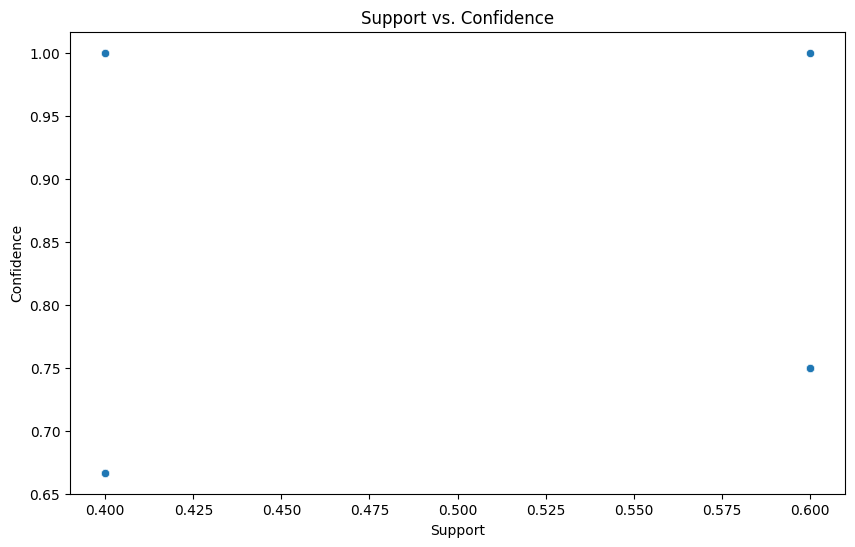

In [26]:
#Visualizing Association Rules Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns


#Plot Support vs. Confidence

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules)
plt.title("Support vs. Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

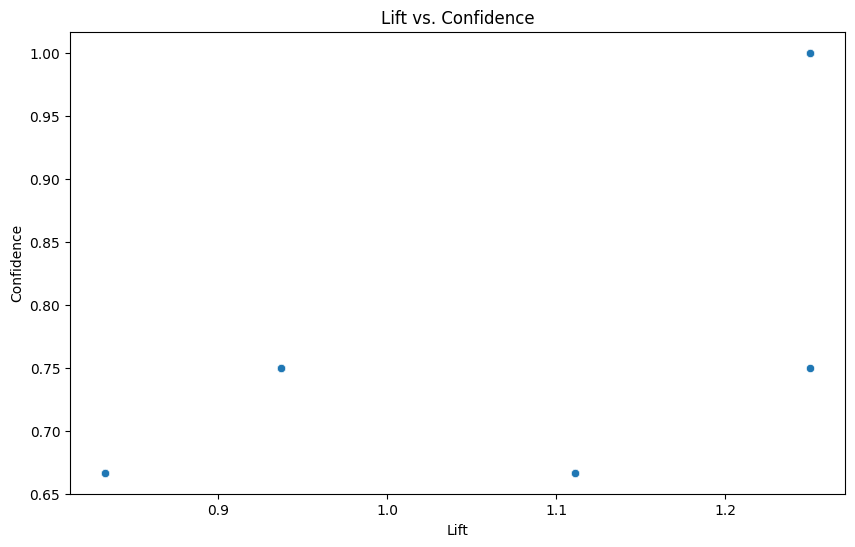

In [27]:
#Plot Lift vs. Confidence

plt.figure(figsize=(10, 6))
sns.scatterplot(x="lift", y="confidence", data=rules)
plt.title("Lift vs. Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()